# Get external field with viresclient

Use viresclient to get external magnetic field. I will subtract CHAOS model predictions in two ways: 
* 1) Subtract the CHAOS estimate of the internal field, and 
* 2) Subtract the CHAOS estimate of the internal field and the CHAOS estimte of the magnetospheric field

The first case will produce the (arguably) best estimate of the "external field", and the second case will produce the best estimate of the "ionospheric field"

In [1]:
%pylab
%matplotlib inline
import viresclient
from datetime import datetime as dt

data = ['B_NEC']
models = ["'CHAOS-internal' = 'CHAOS-Core' + 'CHAOS-Static'",
          "'CHAOS-full'     = 'CHAOS-Core' + 'CHAOS-Static' + 'CHAOS-MMA-Primary' + 'CHAOS-MMA-Secondary'"]

request = viresclient.SwarmRequest()
request.set_collection('SW_OPER_MAGA_LR_1B')
request.set_products(measurements = data, models = models, residuals = False)

data = request.get_between(
        start_time=dt(2015, 3, 18, 0),
        end_time=dt(2015, 3, 18, 1))

data = data.as_xarray()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.389MB)


Text(0.5, 0, 'UT')

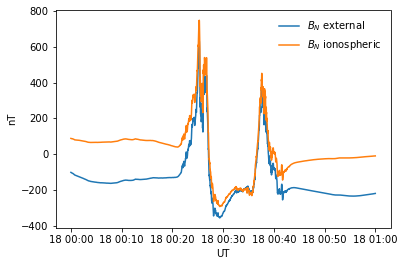

In [8]:
external_field = data['B_NEC'] - data['B_NEC_CHAOS-internal']
ionospheric_field = data['B_NEC'] - data['B_NEC_CHAOS-full']
fig = figure()
ax = fig.add_subplot(111)
ax.plot(data['Timestamp'].to_pandas().index.to_pydatetime(), external_field.T[0], label = '$B_N$ external')
ax.plot(data['Timestamp'].to_pandas().index.to_pydatetime(), ionospheric_field.T[0], label = '$B_N$ ionospheric')
ax.legend(frameon = False)
ax.set_ylabel('nT')
ax.set_xlabel('UT')